In [4]:
import numpy as np
import os
from hsflfm.util import MetadataManager, load_dictionary, save_dictionary
from hsflfm.processing import StrikeProcessor
from hsflfm.analysis import ResultPlotter, ResultManager, BulkAnalyzer
from matplotlib import pyplot as plt
from tqdm import tqdm

In [7]:
def get_filename(specimen_number, strike_number):
    # very hard-coded, we'll adjust this
    folder = "../ground_truth_tests_20250429"
    if not os.path.exists(folder):
        os.mkdir(folder)
    spec_folder = folder + f"/{specimen_number}"
    if not os.path.exists(spec_folder):
        os.mkdir(spec_folder)
    filename = spec_folder + f"/strike_{int(strike_number)}.json"
    return filename

def get_save_filename(specimen_number, strike_number):
    # very hard-coded, we'll adjust this
    folder = "../ground_truth_tests_20250429"
    if not os.path.exists(folder):
        os.mkdir(folder)
    spec_folder = folder + f"/{specimen_number}"
    if not os.path.exists(spec_folder):
        os.mkdir(spec_folder)
    filename = spec_folder + f"/strike_{int(strike_number)}_full_results.json"
    return filename

In [8]:
specimen_numbers = ["20250429_OB_1"]#MetadataManager.all_specimen_numbers()
for specimen_number in specimen_numbers:
    mm = MetadataManager(specimen_number)
    for strike_number in tqdm(mm.strike_numbers):
        save_filename = get_save_filename(specimen_number, strike_number)
        if os.path.exists(save_filename):
            #print(f"already completed {specimen_number}, {strike_number}")
            continue
        filename = get_filename(specimen_number, strike_number)

        if not os.path.exists(filename):
            continue

        align_results = load_dictionary(filename)

        processor = StrikeProcessor(align_results)
        processor.get_flow_vectors()
        processor.run_regression() 
        processor.get_relative_displacements() 
        result_info = processor.condense_info() 

        #plotter = ResultPlotter(result_info)
        #plotter.scatter_peak_disp() 
        #plotter.plot_all_displacement()
        #plt.show()
        #break

        save_dictionary(result_info, save_filename)

  0%|          | 0/5 [00:00<?, ?it/s]C:\Users\clare\OneDrive - Duke University\Projects\Re-imaging\git\HighSpeedFLFM\hsflfm\processing\processing_functions.py:205: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\Convolution.cpp:1037.)
  output = conv1d(signal, self.filters, padding="same")
100%|██████████| 5/5 [03:58<00:00, 47.74s/it]


In [49]:
filename = get_save_filename("20250429_OB_1", 4)

In [50]:
result_info = load_dictionary(filename) 

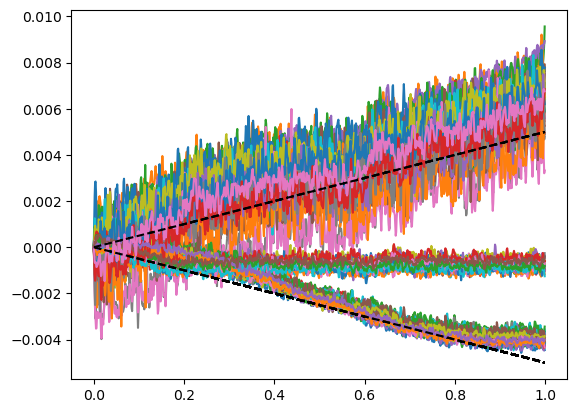

In [51]:
cpd = np.asarray(result_info["camera_point_displacements"])
for p in cpd:
    time = np.arange(p.shape[0]) / 1000 
    speed = 0.02 / 4 
    gt = time * speed
    plt.plot(time, p)
    plt.plot(time, gt, '--', color='black') 
    plt.plot(time, -gt, '--', color='black')

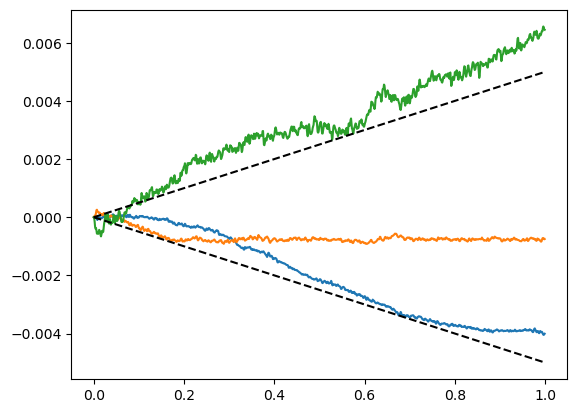

In [52]:
time = np.arange(cpd.shape[1]) / 1000
for k in range(3):
    plt.plot(time, np.mean(cpd[:, :, k], axis=0))

speed = 0.02 / 4 
gt = time * speed
plt.plot(time, gt, '--', color='black') 
plt.plot(time, -gt, '--', color='black')

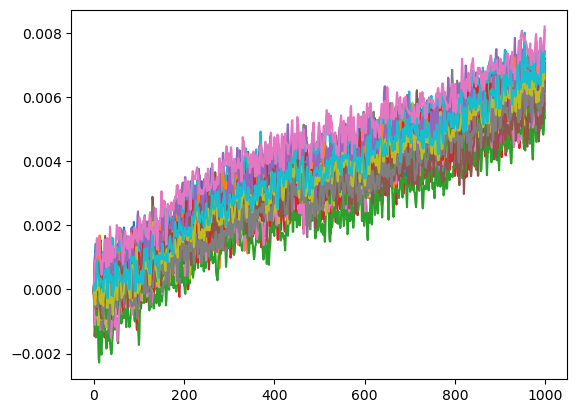

In [17]:
for p in np.asarray(result_info["camera_point_displacements"]):
    plt.plot(p[:, 2])